In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np

In [3]:
img_dm = 28
random_size = 100 

X = tf.placeholder(dtype=tf.float32,shape=[None,img_dm,img_dm],name="Real_data_inputs")
Z = tf.placeholder(dtype=tf.float32,shape=[None,random_size],name="random_data_inputs")
X,Z

(<tf.Tensor 'Real_data_inputs:0' shape=(?, 28, 28) dtype=float32>,
 <tf.Tensor 'random_data_inputs:0' shape=(?, 100) dtype=float32>)

In [4]:
X_flattened = tf.reshape(X,[-1,img_dm*img_dm],name="first_layer")
X_flattened

<tf.Tensor 'first_layer:0' shape=(?, 784) dtype=float32>

In [5]:
g_hiddenlayer = 256
d_hiddenlayer = 256
epsilon = 1e-03
laerning_rate = 0.0002

second_layer_g = tf.layers.dense(Z,g_hiddenlayer,activation=tf.nn.relu,name='second_layer_g')
fake_img = tf.layers.dense(second_layer_g,img_dm*img_dm,activation=tf.nn.sigmoid,name='fake_img')

# second_layer_d = tf.layers.dense(X_flattened,d_hiddenlayer,activation=tf.nn.relu,name='second_layer_d')
# out_d = tf.layers.dense(second_layer_d,1,activation=tf.nn.sigmoid,name='out_d')

# out_real = out_d

second_layer_d = tf.layers.dense(X_flattened,d_hiddenlayer,activation=tf.nn.relu,name='second_layer_d')
out_real = tf.layers.dense(second_layer_d,1,activation=tf.nn.sigmoid,name='out_d')

w_second_layer_d = None
b_second_layer_d = None
W_out_d = None
b_out_d = None

with tf.variable_scope('second_layer_d', reuse=True):
  global w_second_layer_d 
  w_second_layer_d = tf.get_variable('kernel')
  global b_second_layer_d 
  b_second_layer_d = tf.get_variable('bias')

with tf.variable_scope('out_d', reuse=True):
  global W_out_d 
  W_out_d = tf.get_variable('kernel')
  global b_out_d 
  b_out_d = tf.get_variable('bias')


with tf.variable_scope('second_layer_g', reuse=True):
    w_second_layer_g = tf.get_variable('kernel')
    b_second_layer_g = tf.get_variable('bias')

with tf.variable_scope('fake_img', reuse=True):
    W_out_g = tf.get_variable('kernel')
    b_out_g = tf.get_variable('bias')

second_layer_d = tf.layers.dense(fake_img,d_hiddenlayer,activation=tf.nn.relu,name='second_layer_d',reuse=True)
out_fake = tf.layers.dense(second_layer_d,1,activation=tf.nn.sigmoid,name='out_d',reuse=True)

# second_layer_d = tf.layers.dense(fake_img,d_hiddenlayer,activation=tf.nn.relu)
# out_d = tf.layers.dense(second_layer_d,1,activation=tf.nn.sigmoid)

# out_fake = out_d

# l=tf.layers.dense(X_flattened,300,name='ip1')
# with tf.variable_scope('ip1', reuse=True):
#     w = tf.get_variable('kernel')
# w


# First = False
# def dicriminator(X,first=True):
  
#   second_layer_d = tf.layers.dense(X,d_hiddenlayer,activation=tf.nn.relu,name='second_layer_d',reuse=first)
#   out_d = tf.layers.dense(second_layer_d,1,activation=tf.nn.sigmoid,name='out_d',reuse=first)
#   if  
#   with tf.variable_scope('second_layer_d', reuse=True):
#     global w_second_layer_d 
#     w_second_layer_d = tf.get_variable('kernel')
#     global b_second_layer_d 
#     b_second_layer_d = tf.get_variable('bias')

#   with tf.variable_scope('out_d', reuse=True):
#     global W_out_d 
#     W_out_d = tf.get_variable('kernel')
#     global b_out_d 
#     b_out_d = tf.get_variable('bias')
#   return out_d

# out_real = dicriminator(X_flattened,First)
# First = True
# out_fake = dicriminator(fake_img,First)

D_Loss = -tf.reduce_mean(tf.add(tf.log(out_real+epsilon),tf.log(1-out_fake+epsilon)),name='d_loss')
G_loss = -tf.reduce_mean(tf.log(out_fake+epsilon),name='G_loss') 


Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [6]:
G_loss,D_Loss

(<tf.Tensor 'Neg_1:0' shape=() dtype=float32>,
 <tf.Tensor 'Neg:0' shape=() dtype=float32>)

In [7]:
optimizer = tf.train.AdamOptimizer(laerning_rate)
optimizer2 = tf.train.AdamOptimizer(laerning_rate)
D_op = optimizer.minimize(D_Loss,var_list=[w_second_layer_d,W_out_d,b_second_layer_d,b_out_d] ,name="training_D")
G_op = optimizer2.minimize(G_loss,var_list=[w_second_layer_g,W_out_g,b_second_layer_g,b_out_g] ,name="training_G")
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

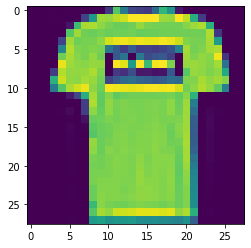

In [9]:
import matplotlib.pyplot as plt
 
plt.imshow(x_train[1])

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x = np.concatenate((x_train,x_test),axis=0)

In [12]:
x.shape

(70000, 28, 28)

In [38]:
n_epochs = 1000
batch_size = 100
restore_checkpoint = True

n_iterations_per_epoch =  x.shape[0] // batch_size
best_loss_val = np.infty
checkpoint_path = "./my_GAN_network"

with tf.Session() as sess:
  if restore_checkpoint and tf.train.checkpoint_exists(checkpoint_path):
    saver.restore(sess, checkpoint_path)
  else:
    init.run()

  for epoch in range(n_epochs):
    Genarator_loss = 0
    Discriminator_loss = 0
    for iteration in range( n_iterations_per_epoch ):
        X_batch = x[batch_size*iteration:batch_size*(iteration+1)]
          # Run the training operation and measure the loss:
        _,_,Discr_loss, GAN_loss,_ = sess.run(
                [D_op,G_op,D_Loss,G_loss,fake_img],
                feed_dict={X: X_batch/255,
                           Z: np.random.uniform(-1,1,size=(batch_size,random_size))
                           })
        print("\rIteration: {}/{} ({:.1f}%)  Genarator Loss: {:.5f} , Discriminator Loss: {:.5f}".format(
                      iteration+1, n_iterations_per_epoch,
                      iteration * 100 / n_iterations_per_epoch,
                      GAN_loss,Discr_loss),
                  end="       ")
      
        Genarator_loss += GAN_loss
        Discriminator_loss += Discr_loss
    Genarator_loss /= n_iterations_per_epoch
    Discriminator_loss /= n_iterations_per_epoch
    if(epoch % 20 == 0):
      print(f"Epoch : {epoch} , Genarator Loss: {Genarator_loss} , Discriminator Loss: {Discriminator_loss}")
    # if Genarator_loss < best_loss_val:
    save_path = saver.save(sess, checkpoint_path)
      # best_loss_val = GAN_loss


INFO:tensorflow:Restoring parameters from ./my_GAN_network
Iteration: 700/700 (99.9%)  Genarator Loss: 1.14251 , Discriminator Loss: 0.92838       Epoch : 0 , Genarator Loss: 1.2627457292590822 , Discriminator Loss: 0.942210208433015
Iteration: 700/700 (99.9%)  Genarator Loss: 1.28455 , Discriminator Loss: 0.82686       Epoch : 20 , Genarator Loss: 1.2729875597783498 , Discriminator Loss: 0.9421745795863016
Iteration: 700/700 (99.9%)  Genarator Loss: 1.18414 , Discriminator Loss: 0.86531       Epoch : 40 , Genarator Loss: 1.2711492059912 , Discriminator Loss: 0.9423239145108632
Iteration: 700/700 (99.9%)  Genarator Loss: 1.22312 , Discriminator Loss: 0.85219       Epoch : 60 , Genarator Loss: 1.276721554483686 , Discriminator Loss: 0.9367802024739129
Iteration: 700/700 (99.9%)  Genarator Loss: 1.09759 , Discriminator Loss: 0.90585       Epoch : 80 , Genarator Loss: 1.2798227675471987 , Discriminator Loss: 0.9350994770867483
Iteration: 700/700 (99.9%)  Genarator Loss: 1.13873 , Discrimi

INFO:tensorflow:Restoring parameters from ./my_GAN_network


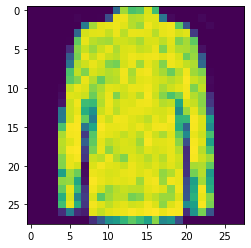

In [54]:
with tf.Session() as sess:
  saver.restore(sess, checkpoint_path)
  f_img = sess.run(
            [fake_img],
            feed_dict={X: x[0].reshape(1,28,28),
                      Z: np.random.uniform(-1,1,size=(1,random_size))
                           })
  plt.imshow(np.reshape(f_img,(28,28)))
